# Step 1: PDF file opening, reading and text extraction

In [1]:
# Import required libraries
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
pdfFileObj = open("Roberto Salazar - Resume.pdf",'rb')

In [18]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [19]:
num_pages = pdfReader.numPages


In [20]:
count = 0

In [21]:
text = ""

In [22]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()


In [23]:
print(text)

 Roberto Salazar 21 Fayette Street Apt. #3L, Brooklyn, NY 11206  (607) 422-0469 | rsalaza4@binghamton.edu | linkedin.com/in/roberto-salazar-reyna  EDUCATION   State University of New York at Binghamton                                                                                                                                           Binghamton, NY Master of Science (MS) in Industrial and Systems Engineering                                                                                   August 2018 – Expected August 2020                                                        GPA: 4.00/4.00 | Alpha Pi Mu Industrial Engineering Honor Society  University of Monterrey (UDEM)                                                                                                                                                                 Monterrey, Mexico Bachelor of Science (BS) in Industrial and Systems Engineering                                                                          

# Step 2: Text cleaning

In [24]:
# Convert all strings to lowercase
text = text.lower()

In [25]:
# Remove numbers
text = re.sub(r'\d+','',text)

In [26]:
# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

# Step 3: Dictionary with key terms by area setup

In [27]:
terms={'Education1':['BE','B.E','B.E.','MCA','M.C.A','B.Tech'],
       'Education2':['M.C.A','MCA','MBA','M.B.A','MS','M.S','M.S.,'],
       'Education3':['Diploma'],
      'MandatorySkills1':['JAVA','CI/CD','SPRING BOOT','AWS','Python'],
      'MandatorySkills2':['PySpark'],
      'Optional_Skills1':['JavaScript','HTML','Angular','React','ReactJS']}

Step 4: Scores calculation per area

In [28]:
# Initializie score counters for each area
edu1 = 0
edu2 = 0
edu3 = 0
ms1 = 0
ms2 = 0
os1 = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Education1':
        for word in terms[area]:
            if word in text:
                edu1 +=10
        scores.append(edu1)
        
    elif area == 'Education2':
        for word in terms[area]:
            if word in text:
                edu2 +=5
        scores.append(edu2)
        
    elif area == 'Education3':
        for word in terms[area]:
            if word in text:
                edu3 +=2
        scores.append(edu3)
        
    elif area == 'MandatorySkills1':
        for word in terms[area]:
            if word in text:
                ms1 +=10
        scores.append(ms1)
        
    elif area == 'MandatorySkills2':
        for word in terms[area]:
            if word in text:
                ms2 +=5
        scores.append(ms2)
        
    else:
        for word in terms[area]:
            if word in text:
                os1 +=10
        scores.append(os1)

# Step 5: Sorted data frame for final scores creation

In [29]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Education1,0
Education2,0
Education3,0
MandatorySkills1,0
MandatorySkills2,0
Optional_Skills1,0


In [30]:
print(scores)

[0, 0, 0, 0, 0, 0]


# Step 6: Pie chart creation

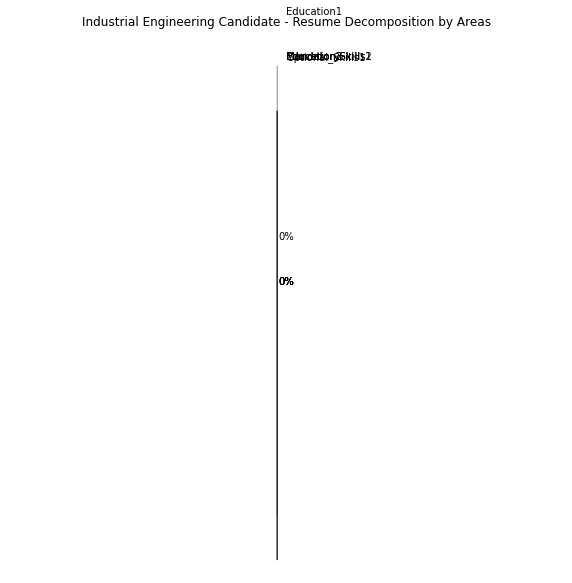

In [31]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')